In [7]:
from web3 import Web3, HTTPProvider
import json
import rlp
from eth_typing import HexStr
from eth_utils import to_bytes
import math
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
w3 = Web3(Web3.HTTPProvider('http://127.0.0.1:8545'))
w3.is_connected()
len(w3.eth.accounts)

251

In [8]:
accounts = w3.eth.accounts
keys = json.load(open('./keys.json'))['private_keys']
AbiPath = './build/contracts/'
AMMabi = json.load(open(AbiPath + 'CPAMM.json'))['abi']
Energyabi = json.load(open(AbiPath + 'EnergyToken.json'))['abi']
Moneyabi = json.load(open(AbiPath + 'MoneyToken.json'))['abi']
Testabi = json.load(open(AbiPath + 'Test.json'))['abi']

MoneyToken_address = Web3.to_checksum_address("0xe78A0F7E598Cc8b0Bb87894B0F60dD2a88d6a8Ab")
EnergyToken_address = Web3.to_checksum_address("0x5b1869D9A4C187F2EAa108f3062412ecf0526b24")
Amm_address = Web3.to_checksum_address("0xC89Ce4735882C9F0f0FE26686c53074E09B0D550")

AMMContract = w3.eth.contract(address=Amm_address,abi=AMMabi)
MoneyContract = w3.eth.contract(address=MoneyToken_address,abi=Moneyabi)
EnergyContract = w3.eth.contract(address=EnergyToken_address,abi=Energyabi)
Test = w3.eth.contract(address="0x254dffcd3277C0b1660F6d42EFbB754edaBAbC2B",abi = Testabi)

admin = Web3.to_checksum_address(w3.eth.accounts[0])

data = pd.read_excel(data)


In [35]:
indexes = pd.read_excel("EC_EV_dataset.xlsx",sheet_name ="Indexes")
indexes.set_index("Player ID",inplace=True)

loads = pd.read_excel("EC_EV_dataset.xlsx",sheet_name ="Load")
loads.set_index("Time",inplace=True)
loads = loads.transpose()

pv = pd.read_excel("EC_EV_dataset.xlsx",sheet_name="PV")
pv = pv.set_index("Time").transpose()

price = pd.read_excel("EC_EV_dataset.xlsx",sheet_name="Sell Price")
price = price.set_index("Time").transpose()


<Axes: xlabel='Time'>

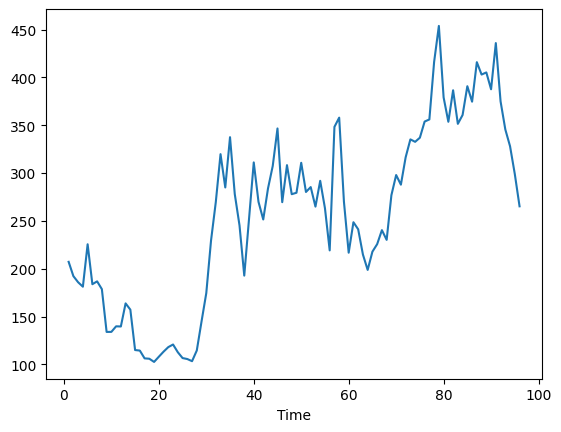

In [38]:
loads.agg('sum').plot()

In [148]:
#Add 50 Liquidity to AMM
MoneyContract.functions.approve(Amm_address,50*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})
EnergyContract.functions.approve(Amm_address,50*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

AMMContract.functions.addLiquidity(50*10**18,50*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

HexBytes('0x39c8263cdd8bceb7acdcc31e09f7b7a5baed64e87653cacf3df1b11b64b2aaad')

In [151]:
MoneyContract.functions.approve(Amm_address,50*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})
#Swap Energy to Money
AMMContract.functions.swap(MoneyToken_address,20*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

HexBytes('0x70e767b08f58dd0beeb6ddc24a910d3b8acdaa45c57b368be5346a8b9faf0d40')

In [144]:
MoneyContract.functions.approve("0x254dffcd3277C0b1660F6d42EFbB754edaBAbC2B",5*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

HexBytes('0x274658551076f44eb41cfbfa2a7aafd8b78252a14e54a90b24f851a76c7d016e')

In [145]:
x = Test.functions.send(5 * 10 ** 18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

In [147]:
MoneyContract.functions.balanceOf("0x254dffcd3277C0b1660F6d42EFbB754edaBAbC2B").call()

5000000000000000000

In [138]:
MoneyContract.functions.transferFrom(me,accounts[1],3*10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

HexBytes('0x923cae33742b7694490d5925fe6bc94137b89b27c40a1f99c94a520a3c155713')

In [121]:
5 * 10**18

5000000000000000000

In [123]:
Test.functions.send(5 * 10**18).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

Test.functions.add

ABIFunctionNotFound: ("The function 'send' was not found in this contract's abi.", ' Are you sure you provided the correct contract abi?')

In [152]:
print("Money: " + str(MoneyContract.functions.balanceOf(accounts[0]).call()) )
print("Energy: " + str(EnergyContract.functions.balanceOf(me).call()) )
print("AMM: "+ str(AMMContract.functions.get_reserve0().call()))

Money: 6999925000000000000000000
Energy: 6999969940000000000000000
AMM: 70000000000000000000


In [111]:
x= AMMContract.functions.addLiquidity(3000000000000000000,3000000000000000000).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

In [112]:
y = AMMContract.functions.swap(MoneyToken_address,3 * 10**decimals).transact({"from":me,"nonce": w3.eth.get_transaction_count(me),"gas":2000000,"gasPrice":w3.eth.gas_price})

In [95]:
AMMContract.functions.totalSupply().call()

0

In [88]:
w3.eth.get_transaction_receipt(x)


AttributeDict({'transactionHash': HexBytes('0xbd6153cd8d4943b87a50428dd623c7b039b55b9ede10ba1e0e68ae32604bc6ef'),
 'transactionIndex': 0,
 'blockNumber': 4,
 'blockHash': HexBytes('0x9c9086ca91576d777bb1134f17f062a9267c5894721f8801660dd927e47ee0c9'),
 'from': '0x90F8bf6A479f320ead074411a4B0e7944Ea8c9C1',
 'to': '0xCfEB869F69431e42cdB54A4F4f105C19C080A601',
 'cumulativeGasUsed': 29054,
 'gasUsed': 29054,
 'contractAddress': None,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 0

In [40]:
#MoneyContract.functions.transfer(accounts[1],7 * (10 ** decimal)).stransact({"from":me})
txs = rlp.decode(hex_to_bytes("0xf8a910850684ee180082e48694a0b86991c6218b36c1d19d4a2e9eb0ce3606eb4880b844a9059cbb000000000000000000000000b8b59a7bc828e6074a4dd00fa422ee6b92703f9200000000000000000000000000000000000000000000000000000000010366401ba0e2a4093875682ac6a1da94cdcc0a783fe61a7273d98e1ebfe77ace9cab91a120a00f553e48f3496b7329a7c0008b3531dd29490c517ad28b0e6c1fba03b79a1dee"), x)
txs.to_dict()

NameError: name 'to_bytes' is not defined

In [72]:
AMMContract.functions

AttributeError: 'Contract' object has no attribute 'methods'

In [13]:
MoneyToken_address = Web3.to_checksum_address("0xe78A0F7E598Cc8b0Bb87894B0F60dD2a88d6a8Ab")
EnergyToken_address = Web3.to_checksum_address("0x5b1869D9A4C187F2EAa108f3062412ecf0526b24")
Amm = Web3.to_checksum_address("0xC89Ce4735882C9F0f0FE26686c53074E09B0D550")

def swapMoney(address,amount):
    
    AMMContract.functions.swap(MoneyToken_address,amount)

In [5]:
# Get Contract
contract_address =Web3.to_checksum_address("0x5fbdb2315678afecb367f032d93f642f64180aa3")
contract = w3.eth.contract(address=contract_address,abi = abi)

In [14]:
contract = w3.eth.contract(address=Amm,abi = abi)